In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn import preprocessing
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [12]:
Xdf_raw = pd.read_csv("./IndoorFingerprint.csv").drop("Y", axis=1)
Ydf_raw = pd.read_csv("./IndoorFingerprint.csv").drop("X", axis=1)

In [13]:
atribute_numbers = Xdf_raw.shape[1]-1
scaler = preprocessing.StandardScaler()
Xdf_raw.iloc[:, 1:atribute_numbers+1] = scaler.fit_transform(Xdf_raw.iloc[:, 1:atribute_numbers+1])
scaler = preprocessing.StandardScaler()
Ydf_raw.iloc[:, 1:atribute_numbers+1] = scaler.fit_transform(Ydf_raw.iloc[:, 1:atribute_numbers+1])
X_x = Xdf_raw.iloc[:, 1:atribute_numbers+1]
y_x = Xdf_raw.iloc[:, 0]

X_y = Ydf_raw.iloc[:, 1:atribute_numbers+1]
y_y = Ydf_raw.iloc[:, 0]


In [14]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    print('Best Train Score: ', max(train_scores_mean) )
    print('Best Test Score: ', max(test_scores_mean) )
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
    

    plt.legend(loc="best")
    return plt

Best Train Score:  0.749109848485
Best Test Score:  0.717333333333


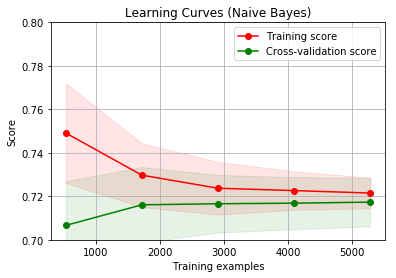

Best Train Score:  0.997348484848
Best Test Score:  0.968181818182


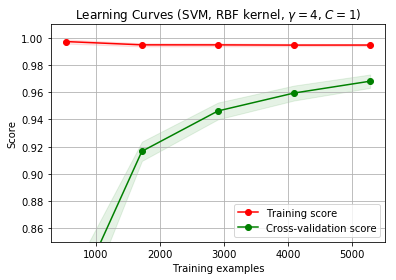

Best Train Score:  0.797537878788
Best Test Score:  0.787575757576


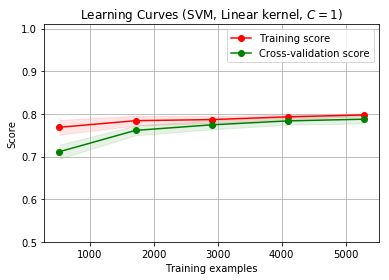

Best Train Score:  0.982518939394
Best Test Score:  0.954393939394


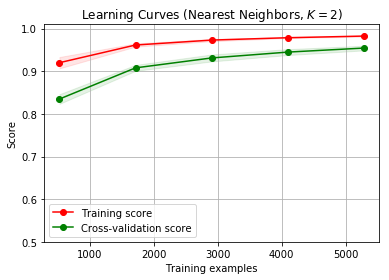

Best Train Score:  0.643181818182
Best Test Score:  0.579166666667


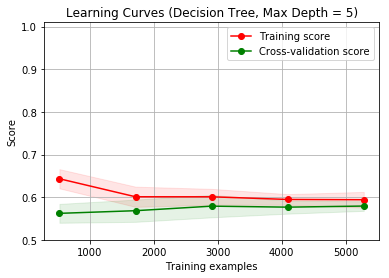

Best Train Score:  0.840965909091
Best Test Score:  0.771265151515


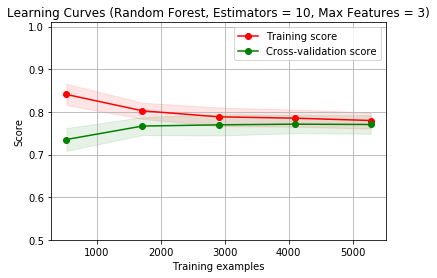

Best Train Score:  0.274758953168
Best Test Score:  0.260378787879


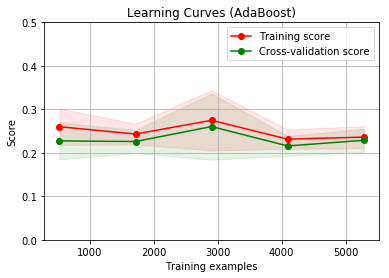

Best Train Score:  0.888825757576
Best Test Score:  0.852575757576


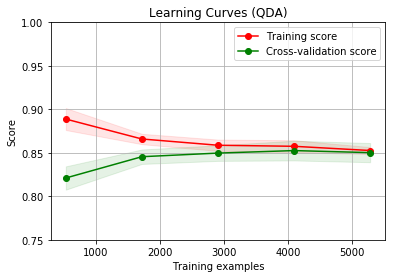

In [15]:
title = "Learning Curves (Naive Bayes)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = GaussianNB()
plot_learning_curve(estimator, title, X_x, y_x, ylim=(0.7, 0.8), cv=cv, n_jobs=4)
plt.show()

title = "Learning Curves (SVM, RBF kernel, $\gamma=4$, $C=1$)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
estimator = SVC(gamma=4, C=1)
plot_learning_curve(estimator, title, X_x, y_x, (0.85, 1.01), cv=cv, n_jobs=4)
plt.show()

title = "Learning Curves (SVM, Linear kernel, $C=1$)"
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
estimator = SVC(kernel="linear", C=1)
plot_learning_curve(estimator, title, X_x, y_x, (0.5, 1.01), cv=cv, n_jobs=4)
plt.show()

title = "Learning Curves (Nearest Neighbors, $K=2$)"
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
estimator = KNeighborsClassifier(2)
plot_learning_curve(estimator, title, X_x, y_x, (0.5, 1.01), cv=cv, n_jobs=4)
plt.show()



title = "Learning Curves (Decision Tree, Max Depth = 5)"
cv = ShuffleSplit(n_splits=10,test_size=0.2, random_state=0)
estimator = DecisionTreeClassifier(max_depth=5)
plot_learning_curve(estimator, title, X_x, y_x, (0.5, 1.01), cv=cv, n_jobs=4)
plt.show()



title = "Learning Curves (Random Forest, Estimators = 10, Max Features = 3)"
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
estimator = RandomForestClassifier(max_depth=5, n_estimators=10, max_features=3)
plot_learning_curve(estimator, title, X_x, y_x, (0.5, 1.01), cv=cv, n_jobs=4)
plt.show()

title = "Learning Curves (AdaBoost)"
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
estimator = AdaBoostClassifier()
plot_learning_curve(estimator, title, X_x, y_x, (0.0, 0.5), cv=cv, n_jobs=4)
plt.show()

title = "Learning Curves (QDA)"
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
estimator = QuadraticDiscriminantAnalysis()
plot_learning_curve(estimator, title, X_x, y_x, (0.75, 1), cv=cv, n_jobs=4)
plt.show()
